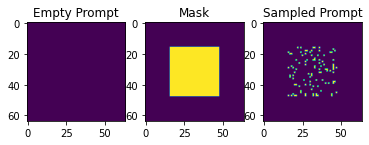

In [3]:
# imports
import torch
import matplotlib.pyplot as plt

# blank prompt map and number of samples
prompts = torch.zeros((64,64))
num_samples = 100

# Define some mask. Interpret entries in masks as weights for sampling. 
# In this case, uniform sampling from a sqaure in the middle.
mask = torch.zeros_like(prompts)
mask[16:48, 16:48] = 1

# (temporarily) flatten the mask and sample inside of it
idx = mask.view(-1).multinomial(
    num_samples=num_samples, 
    replacement=False
)
# (temporarily) flatten the prompts and fill in the sampled pixels
prompts.view(-1)[idx] = 1

# plotting
fig, axes = plt.subplots(1, 3)
axes[0].imshow(torch.zeros((64,64)))
axes[0].set_title('Empty Prompt')
axes[1].imshow(mask)
axes[1].set_title('Mask')
axes[2].imshow(prompts)
axes[2].set_title('Sampled Prompt')
plt.show()


In [6]:
### batching
batch_size = 1000
num_samples = 100

prompts = torch.zeros(batch_size, 64, 64)
masks = torch.zeros_like(prompts)
masks[:, 16:48, 16:48] = 1
idxs  = masks.view(batch_size, -1).multinomial(
    num_samples=num_samples, 
    replacement=False
)

prompts.view(batch_size, -1).scatter_(1, idxs, 1)

torch.Size([1000, 4096])